In [1]:
%pip install -q -r requirements.txt

ERROR: Could not open requirements file: [Errno 2] No such file or directory: 'requirements.txt'
Note: you may need to restart the kernel to use updated packages.


* [1 Введение](#Введение)
** [Вывод](#Вывод1)
* [2 Предобработка данных](#Предобработка)
** [Перевод в нижний регистр](#нижний_регистр)
** [Обработка пропусков](#пропуски)
** [Изменения типов данных](#типданных)
** [Вывод](#вывод2)
* [3 Исследовательский анализ данных](#иследование)
** [Вывод](#вывод3)
* [4 Определение типичного пользователся](#пользователь)
** [Вывод](#вывод4)
* [5 Проверка гипотез](#гипотеза)
* [6 Общий Вывод](#СУПЕРВЫВОД)

# 1 Введение <a class="anchor" id="Вывод"></a>

Перед нами данные по играм до 2016 года. Мы планируем кампанию  2017-й. Для этого нужно понять тенденцию развития платформ, жанров, объемов продаж. Сформировать облик покупателя из разых регионов


## Описание данных
Name — название игры  
Platform — платформа  
Year_of_Release — год выпуска  
Genre — жанр игры  
NA_sales — продажи в Северной Америке (миллионы проданных копий)  
EU_sales — продажи в Европе (миллионы проданных копий)  
JP_sales — продажи в Японии (миллионы проданных копий)  
Other_sales — продажи в других странах (миллионы проданных копий)  
Critic_Score — оценка критиков (максимум 100)  
User_Score — оценка пользователей (максимум 10)  
Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.  

In [2]:
import pandas as pd 
from datetime import datetime
import numpy as np
pd.set_option('display.max_columns', None)
from scipy import stats as st
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import os


<div class="alert alert-info">
<b>Комментарий студента:</b> Ого классное решение. Сейчас же его и скопирую в код =) </div>

In [3]:
pth1 = 'games.csv'
pth2 = '/datasets/games.csv'

if os.path.exists(pth1):
    df = pd.read_csv(pth1)
elif os.path.exists(pth2):
    df = pd.read_csv(pth2)
else:
    print('Something is wrong')  

In [4]:
df.head(20)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [5]:
df.sample(n = 10, random_state = 42)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
3485,London 2012: The Official Video Game of the Ol...,X360,2012.0,Sports,0.07,0.44,0.00,0.07,NaN,NaN,NaN
5500,Etrian Odyssey,DS,2007.0,Role-Playing,0.19,0.02,0.09,0.02,75.0,8.5,T
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN
9489,RollerCoaster Tycoon,XB,2003.0,Strategy,0.10,0.03,0.00,0.00,62.0,8.3,E
12993,Rhapsody: A Musical Adventure,DS,2008.0,Role-Playing,0.05,0.00,0.00,0.00,67.0,6.8,E
12749,Men in Black The Series: Crashdown,PS,2001.0,Shooter,0.03,0.02,0.00,0.00,NaN,NaN,NaN
7270,Samurai Jack: The Amulet of Time,GBA,2003.0,Platform,0.16,0.06,0.00,0.00,63.0,tbd,T
2935,King Kong,2600,1981.0,Action,0.65,0.04,0.00,0.01,NaN,NaN,NaN
8739,Pressure Cooker,2600,1982.0,Action,0.14,0.01,0.00,0.00,NaN,NaN,NaN
2227,Cars,GC,2006.0,Racing,0.72,0.19,0.00,0.03,71.0,7,E


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year_of_Release,16446.0,2006.484616,5.877050,1980.0,2003.0,2007.00,2010.00,2016.00
NA_sales,16715.0,0.263377,0.813604,0.0,0.0,0.08,0.24,41.36
EU_sales,16715.0,0.145060,0.503339,0.0,0.0,0.02,0.11,28.96
JP_sales,16715.0,0.077617,0.308853,0.0,0.0,0.00,0.04,10.22
Other_sales,16715.0,0.047342,0.186731,0.0,0.0,0.01,0.03,10.57
Critic_Score,8137.0,68.967679,13.938165,13.0,60.0,71.00,79.00,98.00


# 2 Предобработка данных <a class="anchor" id="Предобработка"></a>

## Перевод в нижний регистр <a class="anchor" id="нижний_регистр"></a>

In [8]:
df.columns = df.columns.str.lower()
df.head(2) # Проверяем

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN


## Обработка пропусков <a class="anchor" id="пропуски"></a>
Начнем с первого столбца с именами

In [9]:
df[df['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Эти строчки можно удалить. Их удаление не повлечет за собой искажение данных

In [10]:
df = df.dropna(axis='index', how='any', subset=['name'])
df[df['name'].isna()] # проверяем

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


Пропусков в столбце с платформами нет

In [11]:
df[df['platform'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


## Пропуски в дате издания

In [12]:
df[df['year_of_release'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Удалять эти строки мы не можем. Они содержат данные об продажах, жанре и платформе, они нужны для анализа, поэтому сохраним их и заменим пропуски значений в годах издания  на 0 и перевед тип данных в uint16. В дальнейшем исследовании, где будут фигулировать года, мы будем удалять эти строки из нашей выборке по признаку равеноство нулю в столбце year_of_release 

In [13]:
df['year_of_release'] = df['year_of_release'].fillna("0").astype('uint16')

In [14]:
df.info() # Проверяем

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16713 non-null object
year_of_release    16713 non-null uint16
genre              16713 non-null object
na_sales           16713 non-null float64
eu_sales           16713 non-null float64
jp_sales           16713 non-null float64
other_sales        16713 non-null float64
critic_score       8137 non-null float64
user_score         10014 non-null object
rating             9949 non-null object
dtypes: float64(5), object(5), uint16(1)
memory usage: 1.4+ MB


Пропуски в жанрах отсутствуют 

In [15]:
df[df['genre'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


In [16]:
df[df['na_sales'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


In [17]:
df[df['eu_sales'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


In [18]:
df[df['jp_sales'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


## Пропуски в оценке пользователей

In [19]:
df['user_score'].value_counts() # Посмотрим на значения

tbd    2424
7.8     324
8       290
8.2     282
8.3     254
       ... 
9.6       2
0.3       2
0.5       2
9.7       1
0         1
Name: user_score, Length: 96, dtype: int64

In [20]:
df['name'].value_counts() # Посмотирм на повторяющиеся

Need for Speed: Most Wanted                       12
LEGO Marvel Super Heroes                           9
Madden NFL 07                                      9
Ratatouille                                        9
FIFA 14                                            9
                                                  ..
Crysis: Maximum Edition                            1
Rome: Total War                                    1
Sengoku Efuda Yuugi: Hototogisu Ran                1
Super Fire ProWrestling Special                    1
Sokukoku no Kusabi: Hiiro no Kakera 3 Portable     1
Name: name, Length: 11559, dtype: int64

In [21]:
df[df['name'] == 'Need for Speed: Most Wanted']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
253,Need for Speed: Most Wanted,PS2,2005,Racing,2.03,1.79,0.08,0.47,82.0,9.1,T
523,Need for Speed: Most Wanted,PS3,2012,Racing,0.71,1.46,0.06,0.58,NaN,NaN,NaN
1190,Need for Speed: Most Wanted,X360,2012,Racing,0.62,0.78,0.01,0.15,83.0,8.5,T
1591,Need for Speed: Most Wanted,X360,2005,Racing,1.00,0.13,0.02,0.10,83.0,8.5,T
1998,Need for Speed: Most Wanted,XB,2005,Racing,0.53,0.46,0.00,0.05,83.0,8.8,T
2048,Need for Speed: Most Wanted,PSV,2012,Racing,0.33,0.45,0.01,0.22,NaN,NaN,NaN
3581,Need for Speed: Most Wanted,GC,2005,Racing,0.43,0.11,0.00,0.02,80.0,9.1,T
5972,Need for Speed: Most Wanted,PC,2005,Racing,0.02,0.23,0.00,0.04,82.0,8.5,T
6273,Need for Speed: Most Wanted,WiiU,2013,Racing,0.13,0.12,0.00,0.02,NaN,NaN,NaN
6410,Need for Speed: Most Wanted,DS,2005,Racing,0.24,0.01,0.00,0.02,45.0,6.1,E


In [22]:
df[df['name'] == 'Madden NFL 07']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
241,Madden NFL 07,PS2,2006,Sports,3.63,0.24,0.01,0.61,84.0,8.2,E
972,Madden NFL 07,X360,2006,Sports,1.66,0.00,0.01,0.13,80.0,6,E
2035,Madden NFL 07,XB,2006,Sports,0.97,0.03,0.00,0.03,83.0,8.7,E
2479,Madden NFL 07,PSP,0,Sports,0.77,0.03,0.00,0.04,78.0,6.6,E
3229,Madden NFL 07,GC,2006,Sports,0.48,0.13,0.00,0.02,82.0,9.2,E
3838,Madden NFL 07,PS3,2006,Sports,0.47,0.00,0.01,0.04,76.0,4.2,E
4006,Madden NFL 07,Wii,2006,Sports,0.46,0.00,0.00,0.04,81.0,8,E
7372,Madden NFL 07,DS,2006,Sports,0.20,0.00,0.00,0.02,70.0,6.5,E
14889,Madden NFL 07,GBA,2006,Sports,0.02,0.01,0.00,0.00,68.0,9.3,E


In [23]:
df['year_of_release'] = np.where((df.name == 'Madden NFL 07') & (df.year_of_release == 0), 2006, df.year_of_release)
# Поменяем год раз уж нашли, очевидно что они выпустились все в один год

In [24]:
df[df['name'] == 'LEGO Marvel Super Heroes']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
730,LEGO Marvel Super Heroes,X360,2013,Action,1.24,0.79,0.00,0.19,80.0,7.6,E10+
945,LEGO Marvel Super Heroes,PS3,2013,Action,0.77,0.76,0.01,0.29,82.0,7.9,E10+
1139,LEGO Marvel Super Heroes,PS4,2013,Action,0.59,0.76,0.01,0.26,83.0,7.7,E10+
1959,LEGO Marvel Super Heroes,XOne,2013,Action,0.61,0.35,0.00,0.09,NaN,6.8,E10+
2313,LEGO Marvel Super Heroes,3DS,2013,Action,0.42,0.36,0.04,0.07,61.0,5.2,E10+
2778,LEGO Marvel Super Heroes,WiiU,2013,Action,0.31,0.35,0.02,0.06,82.0,8,E10+
3876,LEGO Marvel Super Heroes,PSV,2013,Action,0.11,0.29,0.00,0.11,NaN,NaN,NaN
5054,LEGO Marvel Super Heroes,DS,2013,Action,0.22,0.13,0.00,0.03,NaN,4.8,E10+
8369,LEGO Marvel Super Heroes,PC,2013,Action,0.04,0.12,0.00,0.01,78.0,8.1,E10+


In [25]:
df['rating'] = np.where((df.name == 'LEGO Marvel Super Heroes') & (df.rating.isna()), "E10+", df.rating) # Ну и тут заменим

In [26]:
df[df['name'] == 'Ratatouille']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1598,Ratatouille,DS,2007,Action,0.49,0.62,0.0,0.14,NaN,NaN,NaN
2442,Ratatouille,PS2,2007,Action,0.31,0.00,0.0,0.53,65.0,8,E
3069,Ratatouille,PSP,2007,Action,0.22,0.27,0.0,0.16,64.0,7.1,E
3902,Ratatouille,PS3,2007,Action,0.09,0.32,0.0,0.10,55.0,4.8,E
3948,Ratatouille,Wii,2007,Action,0.43,0.03,0.0,0.04,62.0,6.7,E
6398,Ratatouille,X360,2007,Action,0.23,0.02,0.0,0.02,56.0,tbd,E
7681,Ratatouille,GBA,2007,Action,0.14,0.05,0.0,0.00,65.0,tbd,E
9015,Ratatouille,GC,2007,Action,0.11,0.03,0.0,0.00,60.0,5.6,E
14514,Ratatouille,PC,2007,Action,0.01,0.01,0.0,0.00,NaN,7.9,E


In [27]:
df['rating'] = np.where((df.name == 'Ratatouille') & (df.rating.isna()), "E", df.rating)

Tbd, как нам говорит интернет, аббревиатура. Ее расшифровка - это подлежит определению. Проглядев данные, можно заключить, что даже если игра выходила на разных платформах ее оценки пользователей могут разниться. Это связано с качеством реализацией на той или иной платформе, доп контентом, качеством сетевой игры ну и другие факторы, Поэтому, заполнить Tbd не получится заполнить, не нарушив при этом важные показатели. Предлагается выход заменить Tbd на Nan, для удобства работы, ну и чтобы можно было поменятяь тип данных в столбце

In [28]:
df['user_score'] = np.where(df.user_score == 'tbd', np.nan, df.user_score)

In [29]:
df[df['user_score'] == 'tbd']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


In [30]:
df['user_score'] = df['user_score'].astype('float16')

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16713 non-null object
year_of_release    16713 non-null uint16
genre              16713 non-null object
na_sales           16713 non-null float64
eu_sales           16713 non-null float64
jp_sales           16713 non-null float64
other_sales        16713 non-null float64
critic_score       8137 non-null float64
user_score         7590 non-null float16
rating             9951 non-null object
dtypes: float16(1), float64(5), object(4), uint16(1)
memory usage: 1.3+ MB


## Пропуски в оценке Критиков
С оценками критиков такая же история. Даже одинаковые игры, выпущенные на разных платформах, имеют разные оценки критиков, практически по тем же причинам что и у оценок пользователей. Пропуски мы эти заполнить не можем.

In [32]:
df['critic_score'].value_counts()

70.0    256
71.0    254
75.0    245
78.0    240
73.0    238
       ... 
20.0      3
17.0      1
22.0      1
13.0      1
21.0      1
Name: critic_score, Length: 82, dtype: int64

## Пропуски в  рейтинге от организации ESRB
Кампания ESRB была основана в 1994 году, как говорит нам википедия, так что игры, выпускаемые до этого года, не могут иметь этот рейтинг. Поскольку мы планируем кампанию на 2017 год, нас интересует период 2016, 2015 годоы. Тренд в играх длится примерно 2 года. Примеры трендов Battle roayl, Autochess, карточные игры. Если наша кампания хочет выпустить игру, котоаря будет в тренде, то надо опираться именно на последнии 2 года. Это что касается средних игр, у больших проектов, так называемых Triple A проектов, другие факторы, а именно: техническая состаляющая, сюжет, реклама и так далее.

In [33]:
df[(df['rating'].isna()) & (df['year_of_release'] > 2014)].sort_values('year_of_release', ascending = False)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
13642,Star Ocean 5: Integrity and Faithlessness,PS3,2016,Role-Playing,0.00,0.00,0.04,0.00,NaN,NaN,NaN
13744,Stellaris,PC,2016,Strategy,0.00,0.04,0.00,0.00,78.0,8.0,NaN
14345,3DS Classic Collection,3DS,2016,Misc,0.03,0.00,0.00,0.00,NaN,NaN,NaN
14337,F1 2016 (Codemasters),PC,2016,Racing,0.00,0.03,0.00,0.00,NaN,NaN,NaN
14222,Atelier Firis: The Alchemist of the Mysterious...,PS4,2016,Role-Playing,0.00,0.00,0.03,0.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
8744,Wolfenstein: The Old Blood,XOne,2015,Action,0.07,0.07,0.00,0.01,75.0,8.0,NaN
8760,Theatrhythm Dragon Quest,3DS,2015,Misc,0.00,0.00,0.15,0.00,NaN,NaN,NaN
14183,Diabolik Lovers: Dark Fate,PSV,2015,Action,0.00,0.00,0.03,0.00,NaN,NaN,NaN
8812,Tokyo Xanadu,PSV,2015,Role-Playing,0.00,0.00,0.15,0.00,NaN,NaN,NaN


513 интересующих нас игр не имеют рейтинга, это большое число. Заполнять вручную долго, брать среднее значение мы тоже не можем. Придется работаь с тем что есть. В следующий раз попросить дата инженеров присылать более полную базу данных.

In [34]:
df['rating'] = df['rating'].fillna("uknown")

In [35]:
df[(df['rating'].isna()) & (df['year_of_release'] > 2014)].sort_values('year_of_release', ascending = False)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


## Изменения типов данных <a class="anchor" id="типданных"></a>

Изменим тип данных, в основном будет float и category, и уберем из нашей финальной таблицы название игр. Оно нам болше не понадобиться. Анализ по названию игр мы проводить не будем.

In [36]:
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

In [37]:
final_df = df.copy(deep=True)
final_df.drop(['name'], axis=1, inplace=True)
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
platform           16713 non-null object
year_of_release    16713 non-null uint16
genre              16713 non-null object
na_sales           16713 non-null float64
eu_sales           16713 non-null float64
jp_sales           16713 non-null float64
other_sales        16713 non-null float64
critic_score       8137 non-null float64
user_score         7590 non-null float16
rating             16713 non-null object
total_sales        16713 non-null float64
dtypes: float16(1), float64(6), object(3), uint16(1)
memory usage: 1.3+ MB


In [38]:
final_df['platform'] = final_df['platform'].astype('category') # Платформ не так уж много
final_df['genre'] = final_df['genre'].astype('category') # как и жанров
final_df['rating'] = final_df['rating'].astype('category') # как и рейтинга
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
platform           16713 non-null category
year_of_release    16713 non-null uint16
genre              16713 non-null category
na_sales           16713 non-null float64
eu_sales           16713 non-null float64
jp_sales           16713 non-null float64
other_sales        16713 non-null float64
critic_score       8137 non-null float64
user_score         7590 non-null float16
rating             16713 non-null category
total_sales        16713 non-null float64
dtypes: category(3), float16(1), float64(6), uint16(1)
memory usage: 1.0 MB


## 3 Исследовательский анализ данных <a class="anchor" id="иследование"></a>

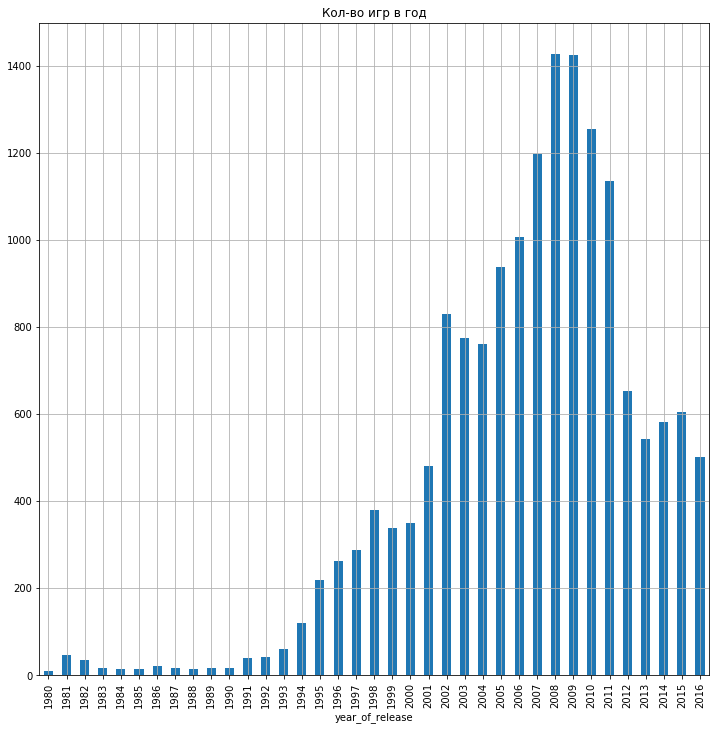

In [39]:
games_year = final_df[final_df['year_of_release'] != 0].groupby('year_of_release')['platform'].count().reset_index()
games_year.plot(
    x='year_of_release',
    y='platform',
    kind='bar',
    grid=True,
    title='Кол-во игр в год',
    legend=False,
    figsize = (12,12)
)

Пик выпуска игр виден на 2008, 2009 года, потом идет снижение кол-ва выпусков игр, это может быть связано с возрастающим требованием игроков к играм

In [40]:
platform_games = final_df.groupby('platform')['na_sales'].count().sort_values(ascending = False).reset_index()
platform_games

,platform,na_sales
0,PS2,2161
1,DS,2151
2,PS3,1331
3,Wii,1320
4,X360,1262
5,PSP,1209
6,PS,1197
7,PC,974
8,XB,824
9,GBA,822


In [41]:
platform_games2 = final_df.groupby('platform')['total_sales'].sum().sort_values(ascending = False).reset_index()
platform_games2 

,platform,total_sales
0,PS2,1255.77
1,X360,971.42
2,PS3,939.65
3,Wii,907.51
4,DS,806.12
5,PS,730.86
6,GBA,317.85
7,PS4,314.14
8,PSP,294.05
9,PC,259.52


Первые пять популярных платформ:PS2, DS, PS3, Wii, X360. Построим их распределения по годам.

In [42]:
PS2_year = final_df[(final_df['platform'] == 'PS2') & (final_df['year_of_release'] != 0)].groupby('year_of_release')['na_sales'].count().reset_index()
DS_year = final_df[(final_df['platform'] == 'DS') & (final_df['year_of_release'] != 0)].groupby('year_of_release')['na_sales'].count().reset_index()
PS3_year = final_df[(final_df['platform'] == 'PS3')  & (final_df['year_of_release'] != 0)].groupby('year_of_release')['na_sales'].count().reset_index()
Wii_year = final_df[(final_df['platform'] == 'Wii') & (final_df['year_of_release'] != 0)].groupby('year_of_release')['na_sales'].count().reset_index()
X360_year = final_df[(final_df['platform'] == 'X360') & (final_df['year_of_release'] != 0)].groupby('year_of_release')['na_sales'].count().reset_index()

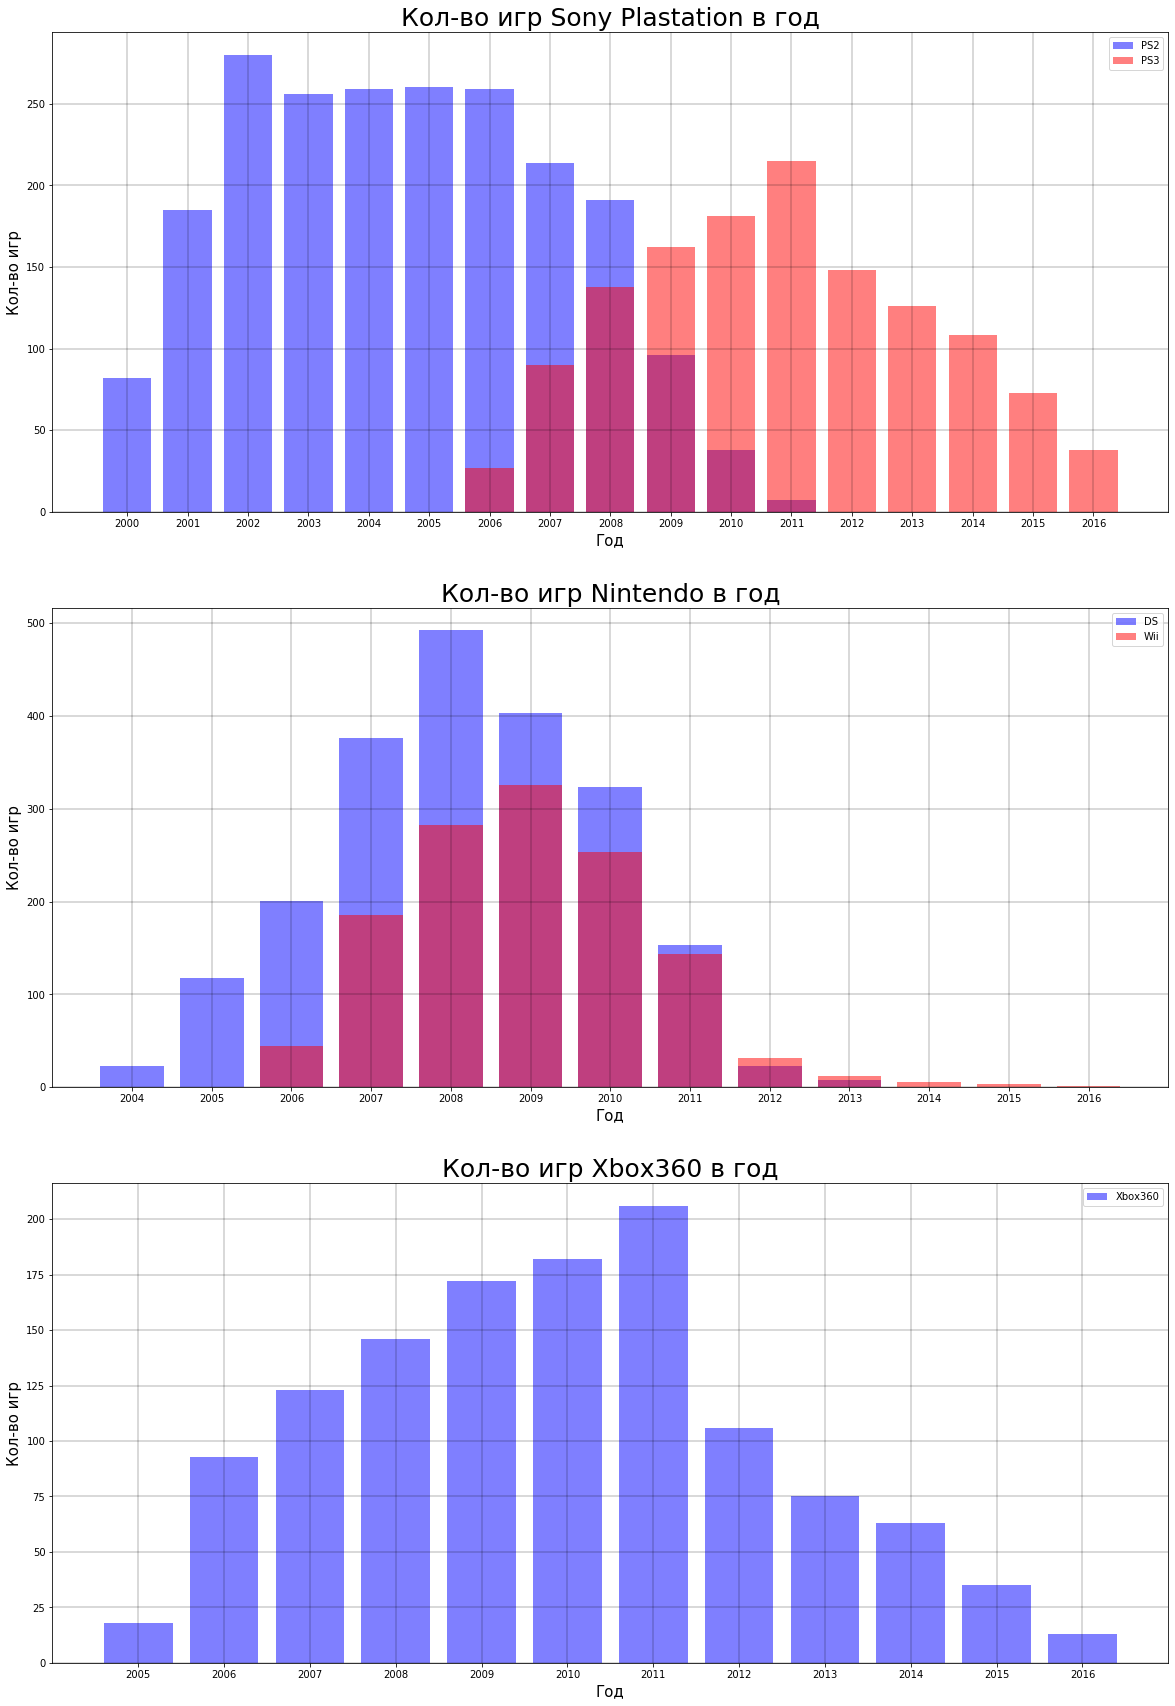

In [43]:
fig, ax = plt.subplots(3, 1)
ax[0].bar(PS2_year['year_of_release'],PS2_year['na_sales'], color = 'blue', alpha = 0.5,label = 'PS2')
ax[0].bar(PS3_year['year_of_release'],PS3_year['na_sales'], color = 'red', alpha = 0.5,label = 'PS3')
ax[0].set_title('Кол-во игр Sony Plastation в год',fontsize = 25)
ax[0].grid(linewidth = 0.3, color = 'black')    #  толщина)
ax[0].set_xlabel('Год',fontsize = 15)
ax[0].set_ylabel('Кол-во игр',fontsize = 15)
ax[0].legend()
ax[0].set(xticks=[i for i in range(2000,2017)])
ax[0].figsize = (5,5)

ax[1].bar(DS_year['year_of_release'],DS_year['na_sales'], color = 'blue', alpha = 0.5,label = 'DS')
ax[1].bar(Wii_year['year_of_release'],Wii_year['na_sales'], color = 'red', alpha = 0.5,label = 'Wii')
ax[1].set_xlim([2003,2017])
ax[1].set_title('Кол-во игр Nintendo в год',fontsize = 25)
ax[1].grid(linewidth = 0.3, color = 'black')    #  толщина)
ax[1].set_xlabel('Год',fontsize = 15)
ax[1].set_ylabel('Кол-во игр',fontsize = 15)
ax[1].set(xticks=[i for i in range(2004,2017)])
ax[1].legend()


ax[2].bar(X360_year['year_of_release'],X360_year['na_sales'], color = 'blue', alpha = 0.5,label = 'Xbox360')
ax[2].set_xlim([2004,2017])
ax[2].set_title('Кол-во игр Xbox360 в год',fontsize = 25)
ax[2].grid(linewidth = 0.3, color = 'black')    #  толщина)
ax[2].set_xlabel('Год',fontsize = 15)
ax[2].set_ylabel('Кол-во игр',fontsize = 15)
ax[2].set(xticks=[i for i in range(2005,2017)])
ax[2].legend()


fig.set_figwidth(20)
fig.set_figheight(30)

Определим потенциальные платформы

In [44]:
good_period = final_df[final_df['year_of_release'] >= 2011]
good_period.groupby('platform')['na_sales'].count().sort_values(ascending = False).reset_index().head(8)


,platform,na_sales
0,PS3,708
1,3DS,512
2,X360,498
3,PSV,429
4,PS4,392
5,PC,389
6,PSP,312
7,XOne,247


In [45]:
PS3_year = good_period[good_period['platform'] == 'PS3'].groupby('year_of_release')['na_sales'].count().reset_index()
PS4_year = good_period[good_period['platform'] == 'PS4'].groupby('year_of_release')['na_sales'].count().reset_index()
PSV_year = good_period[good_period['platform'] == 'PSV'].groupby('year_of_release')['na_sales'].count().reset_index()
X360_year = good_period[good_period['platform'] == 'X360'].groupby('year_of_release')['na_sales'].count().reset_index()
DS_year = good_period[good_period['platform'] == '3DS'].groupby('year_of_release')['na_sales'].count().reset_index()
PC_year = good_period[good_period['platform'] == 'PC'].groupby('year_of_release')['na_sales'].count().reset_index()
PSP_year = good_period[good_period['platform'] == 'PSP'].groupby('year_of_release')['na_sales'].count().reset_index()
XOne_year = good_period[good_period['platform'] == 'XOne'].groupby('year_of_release')['na_sales'].count().reset_index()

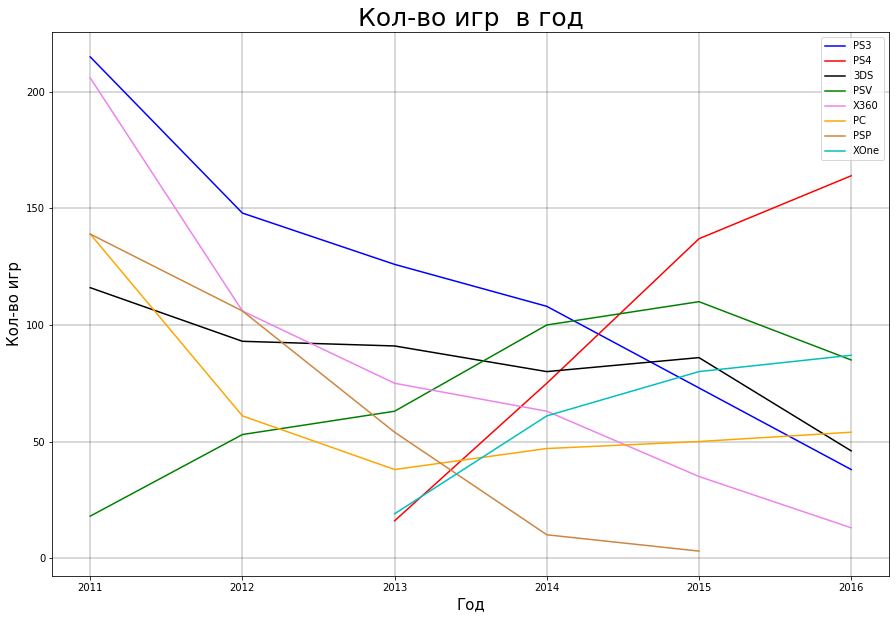

In [46]:
fig, ax = plt.subplots()
ax.plot(PS3_year['year_of_release'],PS3_year['na_sales'], color = 'blue', alpha = 1,label = 'PS3')
ax.plot(PS4_year['year_of_release'],PS4_year['na_sales'], color = 'red', alpha = 1,label = 'PS4')
ax.plot(DS_year['year_of_release'],DS_year['na_sales'], color = 'black', alpha = 1,label = '3DS')
ax.plot(PSV_year['year_of_release'],PSV_year['na_sales'], color = 'green', alpha = 1,label = 'PSV')
ax.plot(X360_year['year_of_release'],X360_year['na_sales'], color = 'violet', alpha = 1,label = 'X360')
ax.plot(PC_year['year_of_release'],PC_year['na_sales'], color = 'orange', alpha = 1,label = 'PC')
ax.plot(PSP_year['year_of_release'],PSP_year['na_sales'], color = 'peru', alpha = 1,label = 'PSP')
ax.plot(XOne_year['year_of_release'],XOne_year['na_sales'], color = 'c', alpha = 1,label = 'XOne')
ax.set_title('Кол-во игр  в год',fontsize = 25)
ax.grid(linewidth = 0.3, color = 'black')    #  толщина)
ax.set_xlabel('Год',fontsize = 15)
ax.set_ylabel('Кол-во игр',fontsize = 15)
ax.legend()
ax.set(xticks=[i for i in range(2011,2017)])
fig.set_figwidth(15)
fig.set_figheight(10)

In [47]:
good_platforms = ['PS3','PS4','PSV','X360','3DS','PC','PSP','XOne']
paltform_data = good_period[good_period['platform'].isin(good_platforms)]

In [48]:
fig_platform = pd.pivot_table(data=paltform_data,
               index='year_of_release',
               columns='platform',
               values = 'total_sales',
               aggfunc='count')

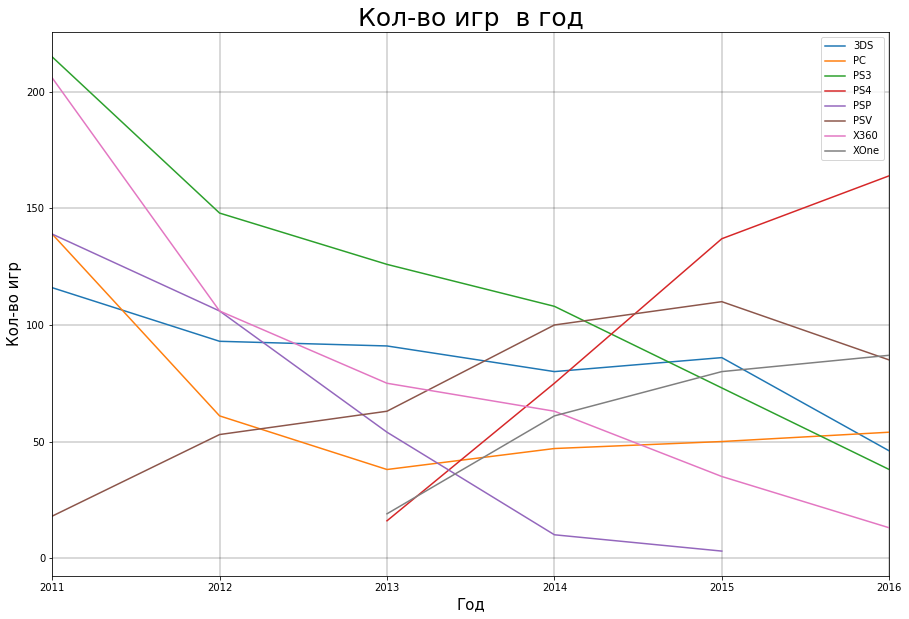

In [49]:
fig1 = fig_platform.plot(figsize = (15,10))
fig1.set_title('Кол-во игр  в год',fontsize = 25)
fig1.set_xlabel('Год',fontsize = 15)
fig1.set_ylabel('Кол-во игр',fontsize = 15)
fig1.legend()
fig1.grid(linewidth = 0.3, color = 'black')


In [50]:
platforms_sales = pd.pivot_table(data=good_period,
               index='year_of_release',
               columns='platform',
               values = 'total_sales',
               aggfunc='sum')

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


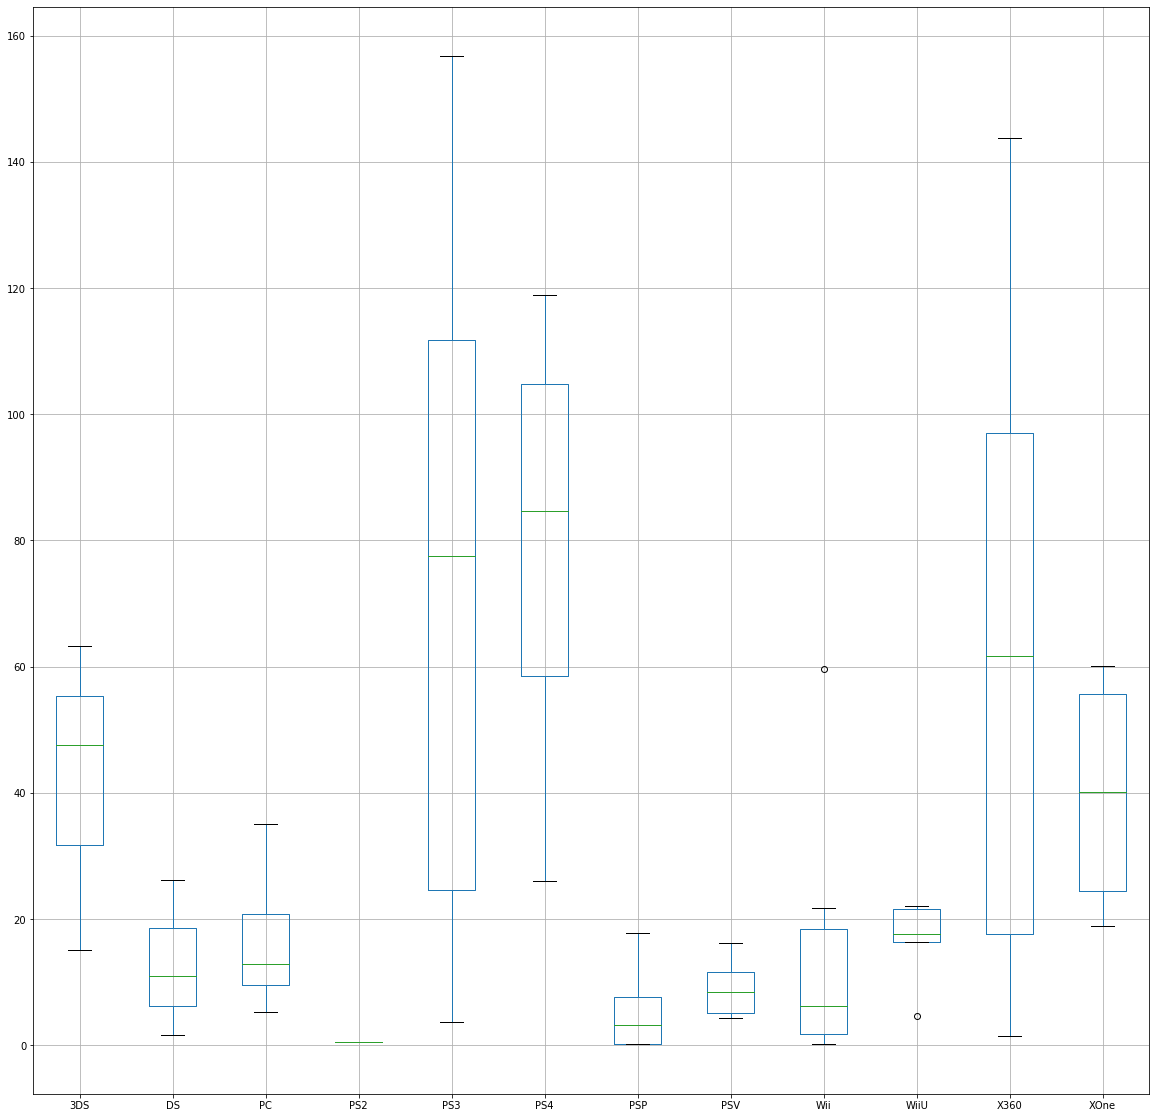

In [51]:
platforms_sales.boxplot(figsize= (20,20), grid = True)

<div class="alert alert-info" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
    <font size="5"><b>Вывод</b></font>

<font color='black'>Видны 3 фаворита на рынке: PS3 PS4 X360. Причем больше в среднем игр продается на платформах sony plastation, хотя верхней ус платформы X360 показывает, что игры и на этой платформе могут иметь большой комерческий успех. Особенно хочется отметиь выброс на Wii. Значит и эта платформа может удивить, если предложить интресный геймплей.</font>
</div> 

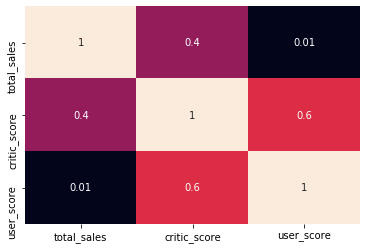

In [52]:
PS3_facts = good_period[good_period['platform'] == 'PS3'][['total_sales','critic_score', 'user_score']]
sb.heatmap(
    PS3_facts.corr(),
    annot = True,
    fmt='.1g',
    cbar=False
) 

ПРЕДПОЛОЖИТЕЛЬНО:  На продажу сильнее всего влияют оценки критиков а не пользователей. Это на платформе ps3.

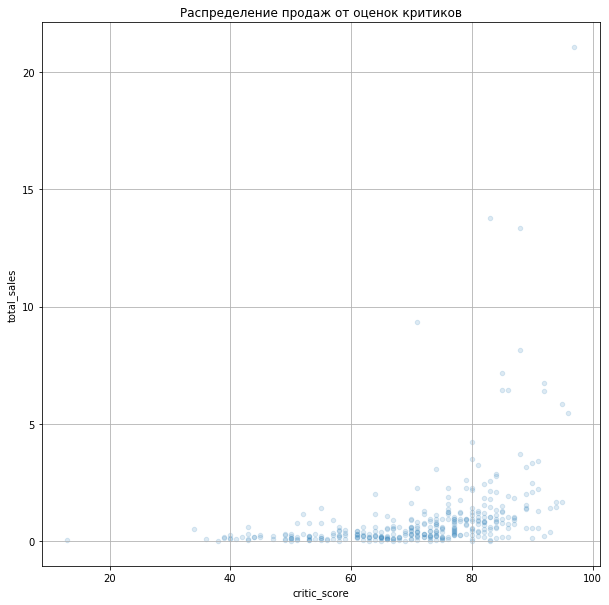

In [53]:
PS3_facts.plot(
    y = 'total_sales', 
    x = 'critic_score', 
    kind = 'scatter',
    alpha = 0.15,
    grid=True,
    title = 'Распределение продаж от оценок критиков',
    figsize = (10,10)
)

Начиная, с оценки критиктов 60 выше намечается рост продаж

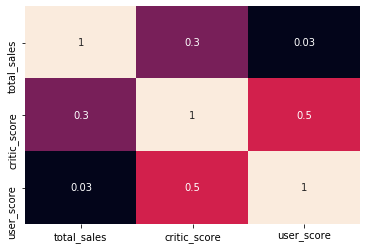

In [54]:
games_fact =  good_period[['total_sales','critic_score', 'user_score']]
sb.heatmap(
    games_fact.corr(),
    annot = True,
    fmt='.1g',
    cbar=False
) 

ПРЕДПОЛОЖИТЕЛЬНО: кореляции примерно равны

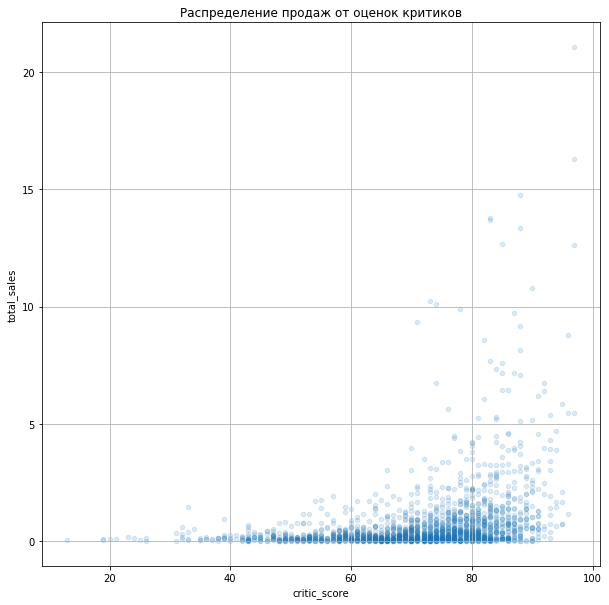

In [55]:
games_fact.plot(
    y = 'total_sales', 
    x = 'critic_score', 
    kind = 'scatter',
    alpha = 0.15,        
    title = 'Распределение продаж от оценок критиков',
    grid=True,
    figsize = (10,10)
)

<div class="alert alert-info" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
    <font size="5"><b>Вывод</b></font>

<font color='black'>Как показывает кореляция и графики рассеивания, для нас важны оценки критиков и наша задача получить оценку как минимум 60 или выше, именно с этой границы намечается более менее рост продаж</font>
</div> 

In [56]:
genres_sales = pd.pivot_table(data=good_period,
               index='year_of_release',
               columns='genre',
               values = 'total_sales',
               aggfunc='sum')
genres_sales

genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
year_of_release,,,,,,,,,,,,
2011,116.68,15.61,22.41,54.38,27.68,4.96,34.81,52.83,98.18,15.14,56.08,8.82
2012,119.25,5.79,9.18,22.22,18.37,1.72,13.61,46.91,71.75,13.36,30.42,3.26
2013,122.51,6.09,7.09,25.27,24.54,0.96,12.37,44.45,62.04,8.63,41.17,6.12
2014,97.23,5.57,15.85,23.38,8.81,1.49,16.66,45.62,65.21,5.58,45.15,0.98
2015,72.02,8.16,7.90,11.57,6.05,0.71,8.07,37.64,67.51,5.66,40.84,1.85
2016,30.11,3.82,4.47,2.60,3.23,0.01,2.79,18.18,38.22,1.89,23.49,1.13


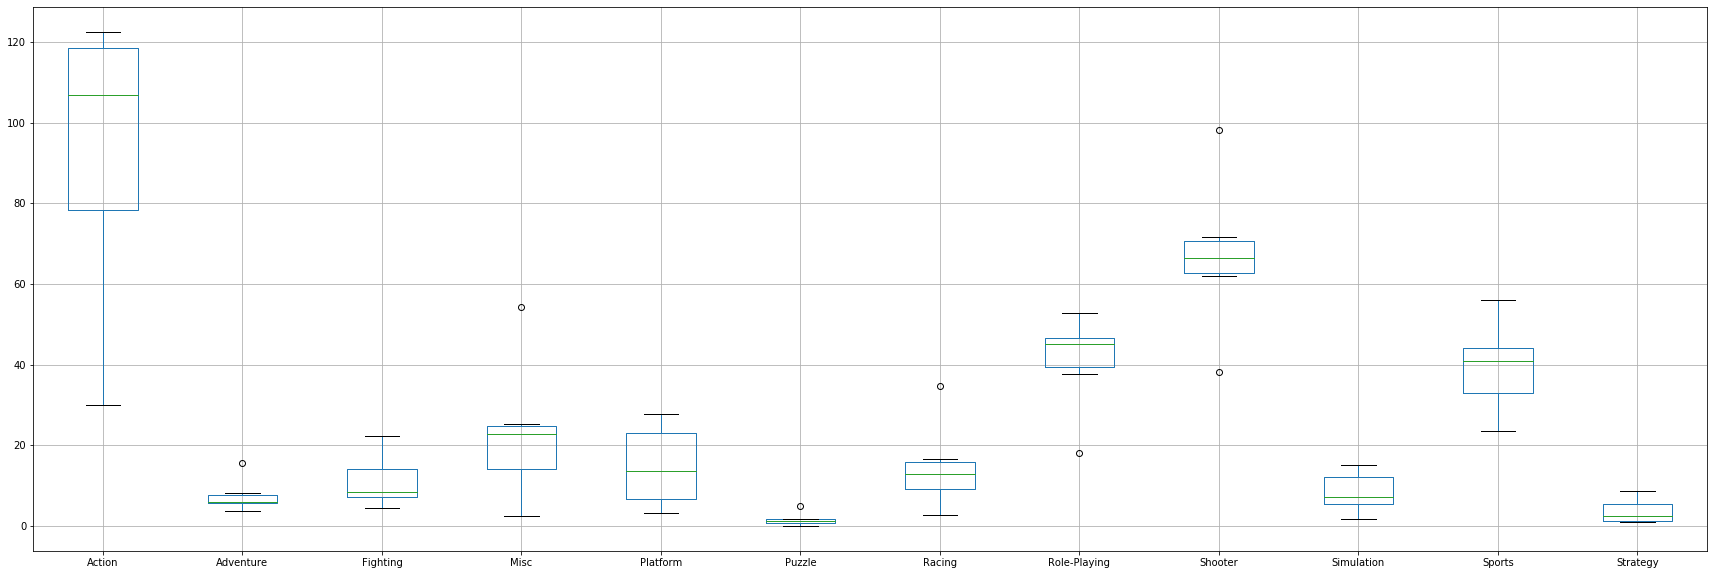

In [57]:
genres_sales.boxplot(figsize= (30,10), grid = True)

<div class="alert alert-info" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
    <font size="5"><b>Вывод</b></font>

<font color='black'>Итак судя по графику намечаются явные фавориты по жанрам: Action, shooter, RPG. Но стоит и обратить внимание и на выбросы в misc racing. Теоритически можно попробовать и в этих жанрах, если получится в них принести что то новое и необычное.</font>
</div>

<div class="alert alert-info" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<font size="5"><b> Вывод </b></font> <a class="anchor" id="вывод3"></a>
    
<font color='black'>Анализ полученных данных показал нам:  
    1. Платформы живут примерно 10 лет и достигают своего расцветв в возрасте 5, 6 лет.  
    2. Были найдены 2 развивающиеся платформы, а именно : PS4 и XboxOne  
    3. На первый взгяд оценки критиков важнее оценок пользователей. Цель получить минимум 60 для хороших продаж. Про оценки пользователей лучше не забывать, зачастую они более конструктивнее.  
    4. Определены жанры, в которые лучше углубиться: Action, shooter, RPG. </font>
</div> 

## 4 Определение типичного пользователся <a class="anchor" id="пользователь"></a>

In [58]:
good_period.head()

,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.203125,M,21.05
23,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.101562,M,16.27
29,X360,2011,Shooter,9.04,4.24,0.13,1.32,88.0,3.400391,M,14.73
31,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,uknown,14.63
33,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,uknown,14.60


In [59]:
good_period.groupby('platform')['na_sales','eu_sales','jp_sales','other_sales'].sum().sort_values(by='na_sales', ascending = False).sort_values(by='eu_sales', ascending = False).sort_values(
    by='jp_sales', ascending = False).sort_values(by='other_sales', ascending = False).reset_index().head(10)

,platform,na_sales,eu_sales,jp_sales,other_sales
0,PS3,168.26,163.10,49.39,64.82
1,PS4,108.74,141.09,15.96,48.35
2,X360,226.80,117.10,3.35,33.13
3,XOne,93.12,51.59,0.34,14.27
4,3DS,82.65,61.27,100.62,13.27
5,PC,29.88,56.70,0.00,11.10
6,Wii,48.56,29.60,8.97,7.89
7,PSV,12.47,13.07,21.84,6.43
8,WiiU,38.10,25.13,13.01,5.95
9,DS,18.86,9.24,8.04,2.59


<div class="alert alert-info" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
    <font size="5"><b>Вывод</b></font>

<font color='black'>По таблице выделяем пять наиболее популярных платформ:</font>
    
<font color='black'> 1. NorthAmerica: X360, PS3, PS4, XOne, 3DS  
    2. Europe:  PS3, PS4, X360, 3DS, PC  
    3. Japan:  3DS, PS3, PSV, PS4, WiiU  
    4. Other: PS3, PS4, X360, XOne, 3DS  
Разница в количестве продаж связана с количеством населения.
    </font>
</div>

In [60]:
good_period.groupby('genre')['na_sales','eu_sales','jp_sales','other_sales'].sum().sort_values(by='na_sales', ascending = False).sort_values(by='eu_sales', ascending = False).sort_values(
    by='jp_sales', ascending = False).sort_values(by='other_sales', ascending = False).reset_index().head(10)

,genre,na_sales,eu_sales,jp_sales,other_sales
0,Action,230.92,199.12,63.62,64.14
1,Shooter,194.43,148.02,11.92,48.54
2,Sports,108.70,88.48,11.09,28.88
3,Role-Playing,83.78,62.30,79.87,19.68
4,Misc,69.69,39.72,17.60,12.41
5,Racing,31.98,40.58,5.64,10.11
6,Platform,38.28,30.07,12.13,8.20
7,Fighting,31.63,16.24,12.38,6.65
8,Adventure,14.76,13.96,12.07,4.25
9,Simulation,15.37,19.72,11.64,3.53


<div class="alert alert-info" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
    <font size="5"><b>Вывод</b></font>

<font color='black'>По жанрам более менее все понятно. Пять наиболее распространенных жанров в мире: Action, Shooter, Sports, Role-Playing, Misc  
    Но выделяется Япония у нее другое распределение: Role-Playing, Action, Misc, Fighting, Platform.   
    Это может быть связано с любовью японцев к ролевым играм по различным Аниме и мангам.</font>
</div>

In [61]:
good_period.groupby('rating')['na_sales'].sum().sort_values(ascending = False).reset_index()

,rating,na_sales
0,M,308.45
1,E,170.17
2,uknown,123.58
3,E10+,117.83
4,T,109.31
5,EC,0.42
6,RP,0.00
7,K-A,0.00
8,AO,0.00


<div class="alert alert-info" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
    <font size="5"><b>Вывод</b></font>

<font color='black'>Если судить по Северной Америке, то рейтинг влияет на продажи. Больше всего продаются игры с пометкой для взрослых, затем игры для всех. Ммежду первым и вторым местом большой разрыв. Это может быть связано, что игры для взросой аудитории интереснее сложнее чем для всех. Тем более средний возраст игрока как правило больше 17 лет.</font>
</div>

<div class="alert alert-info" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<font size="5"><b> Вывод </b></font> <a class="anchor" id="вывод4"></a>
    
<font color='black'>В целом вывод в этой главе совпадает с выводом из предыддущей главы, популярная платформа такая же как и жанр. Единственное что можно добавить, что бло определенно влияние рейтинга на продаваемость в Северной Америке (Северная Америка была взята из-за большего кол-ва проданных копий различных игр). Выпускать лучше игры нацеленные на взрослую аудиторию </font>
</div> 

In [62]:
totalsales_platform = good_period.groupby('platform')['total_sales'].sum().sort_values(ascending = False) 

# Платформы
## Америка

In [63]:
north_america1 =  good_period.groupby('platform')['na_sales'].sum().sort_values(ascending = False).head(5)
north_america2 = pd.DataFrame({'Место': ['1', '2', '3','4','5'], 'Платформа': north_america1.index, 'Продажи в Америке' : north_america1})
north_america2 = north_america2.merge(totalsales_platform, left_on = 'Платформа',right_on = 'platform', how = 'left')
north_america2['Доля продаж от мирового'] = (north_america2['Продажи в Америке'] / north_america2['total_sales'] *100).round(1)
north_america2 = north_america2.drop('total_sales', 1)
north_america2['Доля продаж от Америки'] = (north_america2['Продажи в Америке'] / good_period['na_sales'].sum() * 100).round(1)
#kek.set_index('Место', inplace=True)
north_america2

,Место,Платформа,Продажи в Америке,Доля продаж от мирового,Доля продаж от Америки
0,1,X360,226.80,59.6,27.3
1,2,PS3,168.26,37.8,20.3
2,3,PS4,108.74,34.6,13.1
3,4,XOne,93.12,58.4,11.2
4,5,3DS,82.65,32.1,10.0


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fc058ceab90>],
      dtype=object)

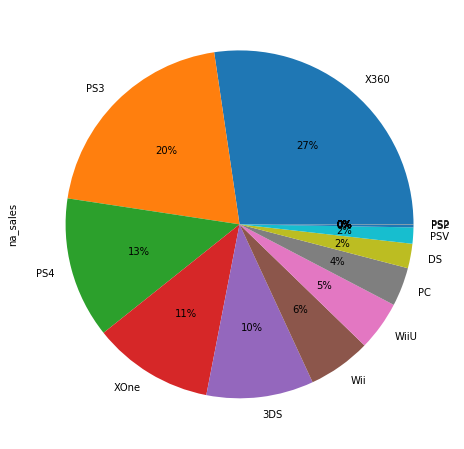

In [64]:
good_period.groupby('platform')['na_sales'].sum().sort_values(ascending = False).plot(kind='pie', subplots=True, figsize=(8, 8), autopct='%1.0f%%')

## Европа

In [65]:
europe1 =  good_period.groupby('platform')['eu_sales'].sum().sort_values(ascending = False).head(5)
europe2 = pd.DataFrame({'Место': ['1', '2', '3','4','5'], 'Платформа': europe1.index, 'Продажи в Европе' : europe1})
europe2 = europe2.merge(totalsales_platform, left_on = 'Платформа',right_on = 'platform', how = 'left')
europe2['Доля продаж от мирового'] = (europe2['Продажи в Европе'] / europe2['total_sales'] *100).round(1)
europe2 = europe2.drop('total_sales', 1)
europe2['Доля продаж от Европы'] = (europe2['Продажи в Европе'] / good_period['eu_sales'].sum() * 100).round(1)
europe2

,Место,Платформа,Продажи в Европе,Доля продаж от мирового,Доля продаж от Европы
0,1,PS3,163.10,36.6,24.4
1,2,PS4,141.09,44.9,21.1
2,3,X360,117.10,30.8,17.5
3,4,3DS,61.27,23.8,9.1
4,5,PC,56.70,58.0,8.5


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fc058be2150>],
      dtype=object)

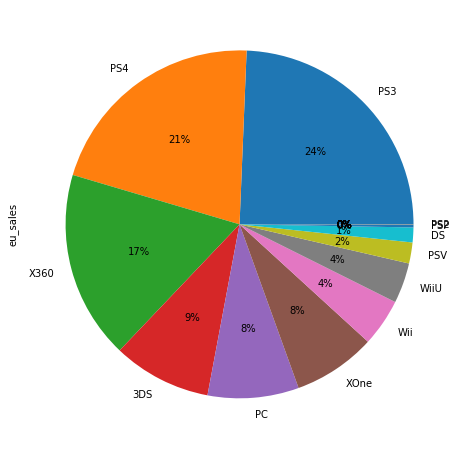

In [66]:
good_period.groupby('platform')['eu_sales'].sum().sort_values(ascending = False).plot(kind='pie', subplots=True, figsize=(8, 8), autopct='%1.0f%%')

## Япония

In [67]:
jap1 =  good_period.groupby('platform')['jp_sales'].sum().sort_values(ascending = False).head(5)
jap2 = pd.DataFrame({'Место': ['1', '2', '3','4','5'], 'Платформа': jap1.index, 'Продажи в Японии' : jap1})
jap2 = jap2.merge(totalsales_platform, left_on = 'Платформа',right_on = 'platform', how = 'left')
jap2['Доля продаж от мирового'] = (jap2['Продажи в Японии'] / jap2['total_sales'] *100).round(1)
jap2 = jap2.drop('total_sales', 1)
jap2['Доля продаж от Европы'] = (jap2['Продажи в Японии'] / good_period['jp_sales'].sum() * 100).round(1)
jap2

,Место,Платформа,Продажи в Японии,Доля продаж от мирового,Доля продаж от Европы
0,1,3DS,100.62,39.0,41.0
1,2,PS3,49.39,11.1,20.1
2,3,PSP,24.04,82.9,9.8
3,4,PSV,21.84,40.6,8.9
4,5,PS4,15.96,5.1,6.5


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fc059cb4050>],
      dtype=object)

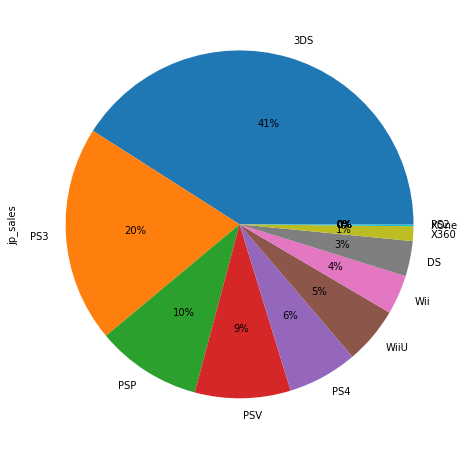

In [68]:
good_period.groupby('platform')['jp_sales'].sum().sort_values(ascending = False).plot(kind='pie', subplots=True, figsize=(8, 8), autopct='%1.0f%%')

# Жанр
## Америка 

In [69]:
good_period.groupby('genre')['na_sales'].sum().sort_values(ascending = False).head(5)


genre
Action          230.92
Shooter         194.43
Sports          108.70
Role-Playing     83.78
Misc             69.69
Name: na_sales, dtype: float64

## Европа

In [70]:
good_period.groupby('genre')['eu_sales'].sum().sort_values(ascending = False).head(5)


genre
Action          199.12
Shooter         148.02
Sports           88.48
Role-Playing     62.30
Racing           40.58
Name: eu_sales, dtype: float64

## Япония

In [71]:
good_period.groupby('genre')['jp_sales'].sum().sort_values(ascending = False).head(5)

genre
Role-Playing    79.87
Action          63.62
Misc            17.60
Fighting        12.38
Platform        12.13
Name: jp_sales, dtype: float64

## Рейтинг
## Америка

In [72]:
good_period.groupby('rating')['na_sales'].sum().sort_values(ascending = False).head(5)

rating
M         308.45
E         170.17
uknown    123.58
E10+      117.83
T         109.31
Name: na_sales, dtype: float64

## Европа

In [73]:
good_period.groupby('rating')['eu_sales'].sum().sort_values(ascending = False).head(5)


rating
M         250.26
E         141.73
uknown    116.32
T          83.16
E10+       78.29
Name: eu_sales, dtype: float64

## Япония

In [74]:
good_period.groupby('rating')['jp_sales'].sum().sort_values(ascending = False).head(5)

rating
uknown    138.21
E          36.68
T          33.39
M          26.14
E10+       11.23
Name: jp_sales, dtype: float64


## 5 Проверка гипотез <a class="anchor" id="гипотеза"></a>

In [75]:
alpha = 0.05 # как общепринято =)

Проверим Гипотезу, что  Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

In [76]:
results = st.ttest_ind(good_period[good_period['platform'] == 'XOne']['user_score'], good_period[good_period['platform'] == 'PC']['user_score'],nan_policy="omit")

In [77]:
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 0.6288920816891947
Не получилось отвергнуть нулевую гипотезу


Не получилось отвергнуть теорию. оценка игроков не зависит от платформы.

<div class="alert alert-info">
<b>Нулевая и Альтернативная гипотеза</b> 
    
Нулевая гипотеза: Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») одинаковые
    
Альтернативная гипотеза:  Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») различаются</div>

Проверим Гипотезу, что Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

In [78]:
results = st.ttest_ind(good_period[good_period['genre'] == 'Action']['user_score'], good_period[good_period['genre'] == 'Sports']['user_score'],nan_policy="omit")

In [79]:
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 4.521251992342284e-24
Отвергаем нулевую гипотезу


Отвергаем нулевую гипотезу, процент что большее различие можно получить случайно слишком мал. JОценки жанров различаются!!!!

<div class="alert alert-info" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
    <font size="5"><b>Вывод</b></font>

<font color='black'> Как показала проверка гипотез, похоже что среднии оценки пользователей не зависит от плтаформы, а вот жанры различаются. </font>
</div>

<div class="alert alert-info" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
    <font size="5"><b>Общий вывод</b></font> <a class="anchor" id="СУПЕРВЫВОД"></a>

<font color='black'> Нам был предоставлен датасет с играми, где были представлены их продажи, рейтинги и так далее. Наша задача заключалась в пронозировании: Какая может быть успешная игра в 2017 году. Был проведен Анализ данных и были получены следующи результаты.  
    Рекомендация для будущей игры в 2017 году:
    1. Игра должна быть выпущена на одной из следующих платформ PS4 или XBox One.  
    2. Игра должны быть в жанре Action, Shooter  
    3. Не затягивать выпуск игр на эти платформы, они сейчас в рассвете, но судя по тенденции им осталось от 4 до 6 лет.  
    4. Ориентироваться на взрослую аудитторию. Игра с рейтингом М.  
    5. Попытаться угодить критикам. Их оценка влияет на продажи. Минимум: 60.  
 </font>     
<font color='black'>    Все эти рекомендации не являются обязательными. Игровой шедевр может быть любого жанра и для любой аудитории. Главное чтобы в игре была ДУША. Один из самых лучших примеров Heroes of Might and Magic III</font>
</div>

In [80]:
#!c1.4
